In [45]:
#GENERAL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
# IMAGE PROCESS
import cv2
plt.style.use("dark_background")

# Pre Processing

We'll borrow the preprocessing from: https://www.kaggle.com/brsdincer/surface-crack-detection-end-to-end-process by Baris Dincer

In [46]:
Surface_Data = Path("crack_dataset")

In [47]:
Surface_JPG_Path = list(Surface_Data.glob(r"*/*.jpg"))

In [48]:
Surface_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Surface_JPG_Path))

TO SERIES

In [49]:
Surface_JPG_Path_Series = pd.Series(Surface_JPG_Path,name="JPG").astype(str)
Surface_Labels_Series = pd.Series(Surface_Labels,name="CATEGORY")

TO DATAFRAME

In [50]:
Main_Surface_Data = pd.concat([Surface_JPG_Path_Series,Surface_Labels_Series],axis=1)

In [51]:
print(Main_Surface_Data.head(-1))

                                      JPG  CATEGORY
0      crack_dataset/Positive/16154_1.jpg  Positive
1        crack_dataset/Positive/02573.jpg  Positive
2        crack_dataset/Positive/01844.jpg  Positive
3        crack_dataset/Positive/19878.jpg  Positive
4      crack_dataset/Positive/15425_1.jpg  Positive
...                                   ...       ...
39994    crack_dataset/Negative/04552.jpg  Negative
39995    crack_dataset/Negative/12571.jpg  Negative
39996    crack_dataset/Negative/11842.jpg  Negative
39997    crack_dataset/Negative/05281.jpg  Negative
39998    crack_dataset/Negative/03823.jpg  Negative

[39999 rows x 2 columns]


TO SHUFFLE

In [52]:
Main_Surface_Data = Main_Surface_Data.sample(frac=1).reset_index(drop=True)

In [53]:
print(Main_Surface_Data.head(-1))

                                    JPG  CATEGORY
0      crack_dataset/Negative/11259.jpg  Negative
1      crack_dataset/Positive/07509.jpg  Positive
2      crack_dataset/Negative/01790.jpg  Negative
3      crack_dataset/Negative/07719.jpg  Negative
4      crack_dataset/Positive/09453.jpg  Positive
...                                 ...       ...
39994  crack_dataset/Negative/00582.jpg  Negative
39995  crack_dataset/Positive/02589.jpg  Positive
39996  crack_dataset/Negative/18304.jpg  Negative
39997  crack_dataset/Negative/05619.jpg  Negative
39998  crack_dataset/Negative/14506.jpg  Negative

[39999 rows x 2 columns]


# VISUALIZATION

LABELS

In [54]:
Positive_Surface = Main_Surface_Data[Main_Surface_Data["CATEGORY"] == "Positive"]
Negative_Surface = Main_Surface_Data[Main_Surface_Data["CATEGORY"] == "Negative"]

Positive_Surface = Positive_Surface.reset_index()
Negative_Surface = Negative_Surface.reset_index()

In [55]:
def simple_vision(path):
    figure = plt.figure(figsize=(8,8))
    
    Reading_Img = cv2.imread(path)
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)
    
    plt.xlabel(Reading_Img.shape)
    plt.ylabel(Reading_Img.size)
    plt.imshow(Reading_Img)


In [56]:
def canny_vision(path):
    figure = plt.figure(figsize=(8,8))
    
    Reading_Img = cv2.imread(path)
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)
    Canny_Img = cv2.Canny(Reading_Img,90,100)
    
    plt.xlabel(Canny_Img.shape)
    plt.ylabel(Canny_Img.size)
    plt.imshow(Canny_Img)


In [57]:


def threshold_vision(path):
    figure = plt.figure(figsize=(8,8))
    
    Reading_Img = cv2.imread(path)
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)
    _,Threshold_Img = cv2.threshold(Reading_Img,130,255,cv2.THRESH_BINARY_INV)
    
    plt.xlabel(Threshold_Img.shape)
    plt.ylabel(Threshold_Img.size)
    plt.imshow(Threshold_Img)



In [58]:
def threshold_canny(path):
    figure = plt.figure(figsize=(8,8))
    
    Reading_Img = cv2.imread(path)
    Reading_Img = cv2.cvtColor(Reading_Img,cv2.COLOR_BGR2RGB)
    _,Threshold_Img = cv2.threshold(Reading_Img,130,255,cv2.THRESH_BINARY_INV)
    Canny_Img = cv2.Canny(Threshold_Img,90,100)
    
    plt.xlabel(Canny_Img.shape)
    plt.ylabel(Canny_Img.size)
    plt.imshow(Canny_Img)



SIMPLE VISION

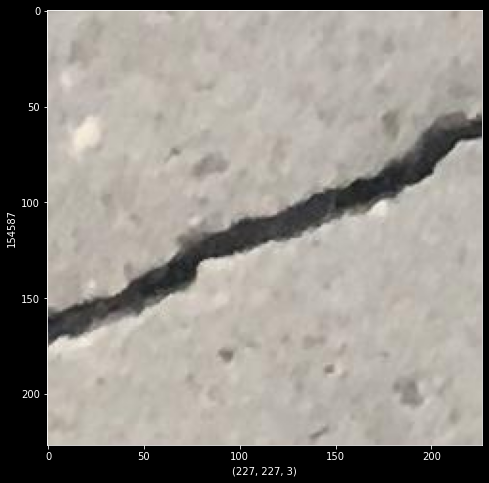

In [59]:
simple_vision(Main_Surface_Data["JPG"][4])

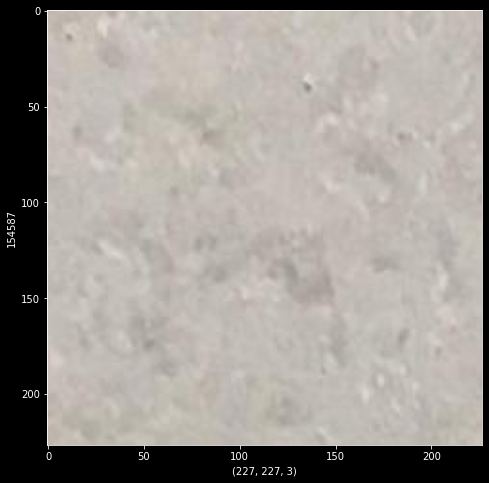

In [60]:


simple_vision(Main_Surface_Data["JPG"][2])
